In [8]:
library(pheatmap)

ERROR: Error in library(pheatmap): there is no package called ‘pheatmap’


In [9]:
human = read.csv('/home/zhaoyp/collaboration/haorui/humanCd8.csv',sep=' ')
human = human[which( human[,'p']<0.05),]
human = human[which(human[,'OR']!=0 ),] 
human = human[which(is.finite(human$OR)),]
human = human[which(human[,'OR']<1),]


In [10]:
mouse = read.csv("/home/zhaoyp/collaboration/haorui/result_0.1_1197_genes_Cd8.csv",sep=' ')
mouse = mouse[which(mouse[,'p']<0.05),]
mouse = mouse[which(mouse[,'OR']!=0),]
mouse = mouse[which(is.finite(mouse$OR)),]
mouse = mouse[which(mouse[,'OR']<1),]


In [11]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
✔ ggplot2 3.3.6      ✔ purrr   0.3.4 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.2      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [12]:
mouse.human <- read.csv('/home/zhaoyp/collaboration/haorui/0.NatMed_Tatlas_lh/Complete List of Human and Mouse Homologs_FromMGI_version_09 May 2023.csv', check.names = FALSE)
mouse.human <- mouse.human[,c(1,2,4)]
colnames(mouse.human) <- c('DB Class Key', 'Common Organism Name', 'Symbol')
mouse.human <- mouse.human %>% pivot_wider(names_from = 'DB Class Key', values_from = "Symbol") %>% t()
mouse.human <- data.frame(mouse.human)[-1,]
mouse.human <- mouse.human[mouse.human[,1] %in% unique(c(mouse[,1], mouse[,2])), ]

Warning message:
“Values from `Symbol` are not uniquely identified; output will contain list-cols.
* Use `values_fn = list` to suppress this warning.
* Use `values_fn = {summary_fun}` to summarise duplicates.
* Use the following dplyr code to identify duplicates.
  {data} %>%
    dplyr::group_by(`Common Organism Name`, `DB Class Key`) %>%
    dplyr::summarise(n = dplyr::n(), .groups = "drop") %>%
    dplyr::filter(n > 1L)”


In [13]:
two_genes_com = data.frame(matrix(nrow=nrow(mouse)*2,ncol=6))
colnames(two_genes_com) <- c('mouse.gene1','mouse.gene2','mouse.Or','mouse.Pvalue','gene1','gene2')
k=1 
for (i in 1:nrow(mouse)){
    mouse.gene1 <- mouse[i,1]
    mouse.gene2 <- mouse[i,2]
    genes1 <- mouse.human[mouse.human[,1] == mouse.gene1,2]
    genes2 <- mouse.human[mouse.human[,1] == mouse.gene2,2]
    # print(genes1) 
    # print(genes2) 
    # print('===========')
    if (length(genes1)==0 ){next}
    if (length(genes2)==0) {next}
    genes1 <- genes1[[1]]
    genes2 <- genes2[[1]]
    if (length(genes1)==0 ){next}
    if (length(genes2)==0) {next}
    for (m in 1:length(genes1)){
        for (n in 1:length(genes2)){
            # print(1)
            two_genes_com[k,5] <- genes1[m]
            two_genes_com[k,6] <- genes2[n]
            two_genes_com[k,1] <- mouse.gene1
            two_genes_com[k,2] <- mouse.gene2
            two_genes_com[k,3] <- mouse[i,3]
            two_genes_com[k,4] <- mouse[i,4]
            k=k+1
        }
    }
}
two_genes_com <- na.omit(two_genes_com)
two_genes_com <- unique(two_genes_com)


In [14]:
colnames(two_genes_com) <- c('mouse.gene1',	'mouse.gene2', 'mouse.Or', 'mouse.Pvalue', 'TransGene1', 'TransGene2') 
two_genes_com$pair = paste0(two_genes_com$TransGene1, '_', two_genes_com$TransGene2)
head(two_genes_com)


mouse.gene1 mouse.gene2 mouse.Or    mouse.Pvalue TransGene1 TransGene2
1 Rack1       Gclm        0.004021963 0            RACK1      GCLM      
2 Selenow     Gclm        0.005310075 0            SELENOW    GCLM      
3 Sem1        Gclm        0.006030130 0            SEM1       GCLM      
4 Gclm        Elob        0.006201012 0            GCLM       ELOB      
5 Gclm        Arhgap45    0.006400630 0            GCLM       ARHGAP45  
6 Gclm        Cd37        0.006694104 0            GCLM       CD37      
  pair         
1 RACK1_GCLM   
2 SELENOW_GCLM 
3 SEM1_GCLM    
4 GCLM_ELOB    
5 GCLM_ARHGAP45
6 GCLM_CD37

In [15]:
human$pair <- paste0(human$gene1, '_', human$gene2)
human$pair1 <- paste0(human$gene2, '_', human$gene1)
df1 <- merge(two_genes_com, human, by='pair', all=TRUE) 
df2 <- merge(two_genes_com, human, by.x='pair', by.y='pair1', all=TRUE) 
colnames(df1) <- c('pair',	'mouse.gene1',	'mouse.gene2',	'mouse.Or',	'mouse.Pvalue',	'TransGene1',	'TransGene2',	'HumanGene1',	'HumanGene2',	'HumanOR', 'Human.Pvalue', 'HumanPair')
colnames(df2) <- c('pair',	'mouse.gene1',	'mouse.gene2',	'mouse.Or',	'mouse.Pvalue',	'TransGene1',	'TransGene2',	'HumanGene1',	'HumanGene2',	'HumanOR', 'Human.Pvalue', 'HumanPair')
df = rbind(df1, df2)

df = df[,c('mouse.gene1',	'mouse.gene2',	'mouse.Or',	'mouse.Pvalue', 'HumanGene1',	'HumanGene2',	'HumanOR', 'Human.Pvalue')]
df <- distinct(df)

In [16]:
ref = df
colnames(ref) = c('mouse.gene1','mouse.gene2','mouse.Or','mouse.Pvalue','gene1','gene2','OR','p')
ref$size <- ifelse(ref$p<=0.05, ifelse(ref$p<=0.01,ifelse(ref$p<0.001,4,3),2), 1)
cor_result <- cor.test(ref$mouse.Or, ref$OR)
p_value <- cor_result$p.value 
formatted_p_value <- format(p_value, scientific = TRUE, digits = 2)

In [18]:
mouse_genes <- unique(c(ref[,c(1)], ref[,2]))
human_genes <- unique(c(ref[,c(5)], ref[,c(6)]))

In [19]:
Matlas = readRDS('/home/zhaoyp/collaboration/haorui/ref_TILAtlas_mouse_v1.rds')
Hatlas = readRDS('/home/zhaoyp/collaboration/haorui/0.NatMed_Tatlas_lh/CD8.rds')

umap1 <- Hatlas@reductions[['umap']]@cell.embeddings[,1] 
Hatlas@reductions[['umap']]@cell.embeddings[,1] <- (-umap1)

Matlas_sub <- subset(Matlas, features= mouse_genes)
Hatlas_sub <- subset(Hatlas, features= human_genes)  

Warning message in subset.Assay(x = x[[assay]], cells = cells, features = assay.features):
“NAs passed in the features vector, removing NAs”
Warning message in subset.Assay(x = x[[assay]], cells = cells, features = assay.features):
“NAs passed in the features vector, removing NAs”
Warning message in subset.Assay(x = x[[assay]], cells = cells, features = assay.features):
“NAs passed in the features vector, removing NAs”
Loading required package: Seurat



In [20]:
write.table(as.matrix(Matlas_sub[['RNA']]@counts), file="Mslot.txt", sep="\t")
write.table(as.matrix(Hatlas_sub[['RNA']]@counts), file="Hslot.txt", sep="\t")

In [15]:
mouse_genes <- unique(c(ref[,c(1)], ref[,2]))
human_genes <- unique(c(ref[,c(5)], ref[,c(6)]))

Matlas = readRDS('/home/zhaoyp/collaboration/haorui/ref_TILAtlas_mouse_v1.rds')
Hatlas = readRDS('/home/zhaoyp/collaboration/haorui/0.NatMed_Tatlas_lh/CD8.rds')
umap1 <- Hatlas@reductions[['umap']]@cell.embeddings[,1] 
Hatlas@reductions[['umap']]@cell.embeddings[,1] <- (-umap1)

Matlas_sub <- subset(Matlas, features= mouse_genes)
Hatlas_sub <- subset(Hatlas, features= human_genes)  

Mslot <- as.matrix(Matlas_sub[['RNA']]@counts )
Mslot <- Mslot[, which(colSums(Mslot >=1)>=10)] 
Hslot <- as.matrix(Hatlas_sub[['RNA']]@counts )
Hslot <- Hslot[, which(colSums(Hslot >=1)>=10)]

mc <- round(cor(t(Mslot)), 3)
hc <- round(cor(t(Hslot)), 3)


Warning message in asMethod(object):
“sparse->dense coercion: allocating vector of size 2.3 GiB”


The "ward" method has been renamed to "ward.D"; note new "ward.D2"

The "ward" method has been renamed to "ward.D"; note new "ward.D2"

The "ward" method has been renamed to "ward.D"; note new "ward.D2"

The "ward" method has been renamed to "ward.D"; note new "ward.D2"



null device 
          1

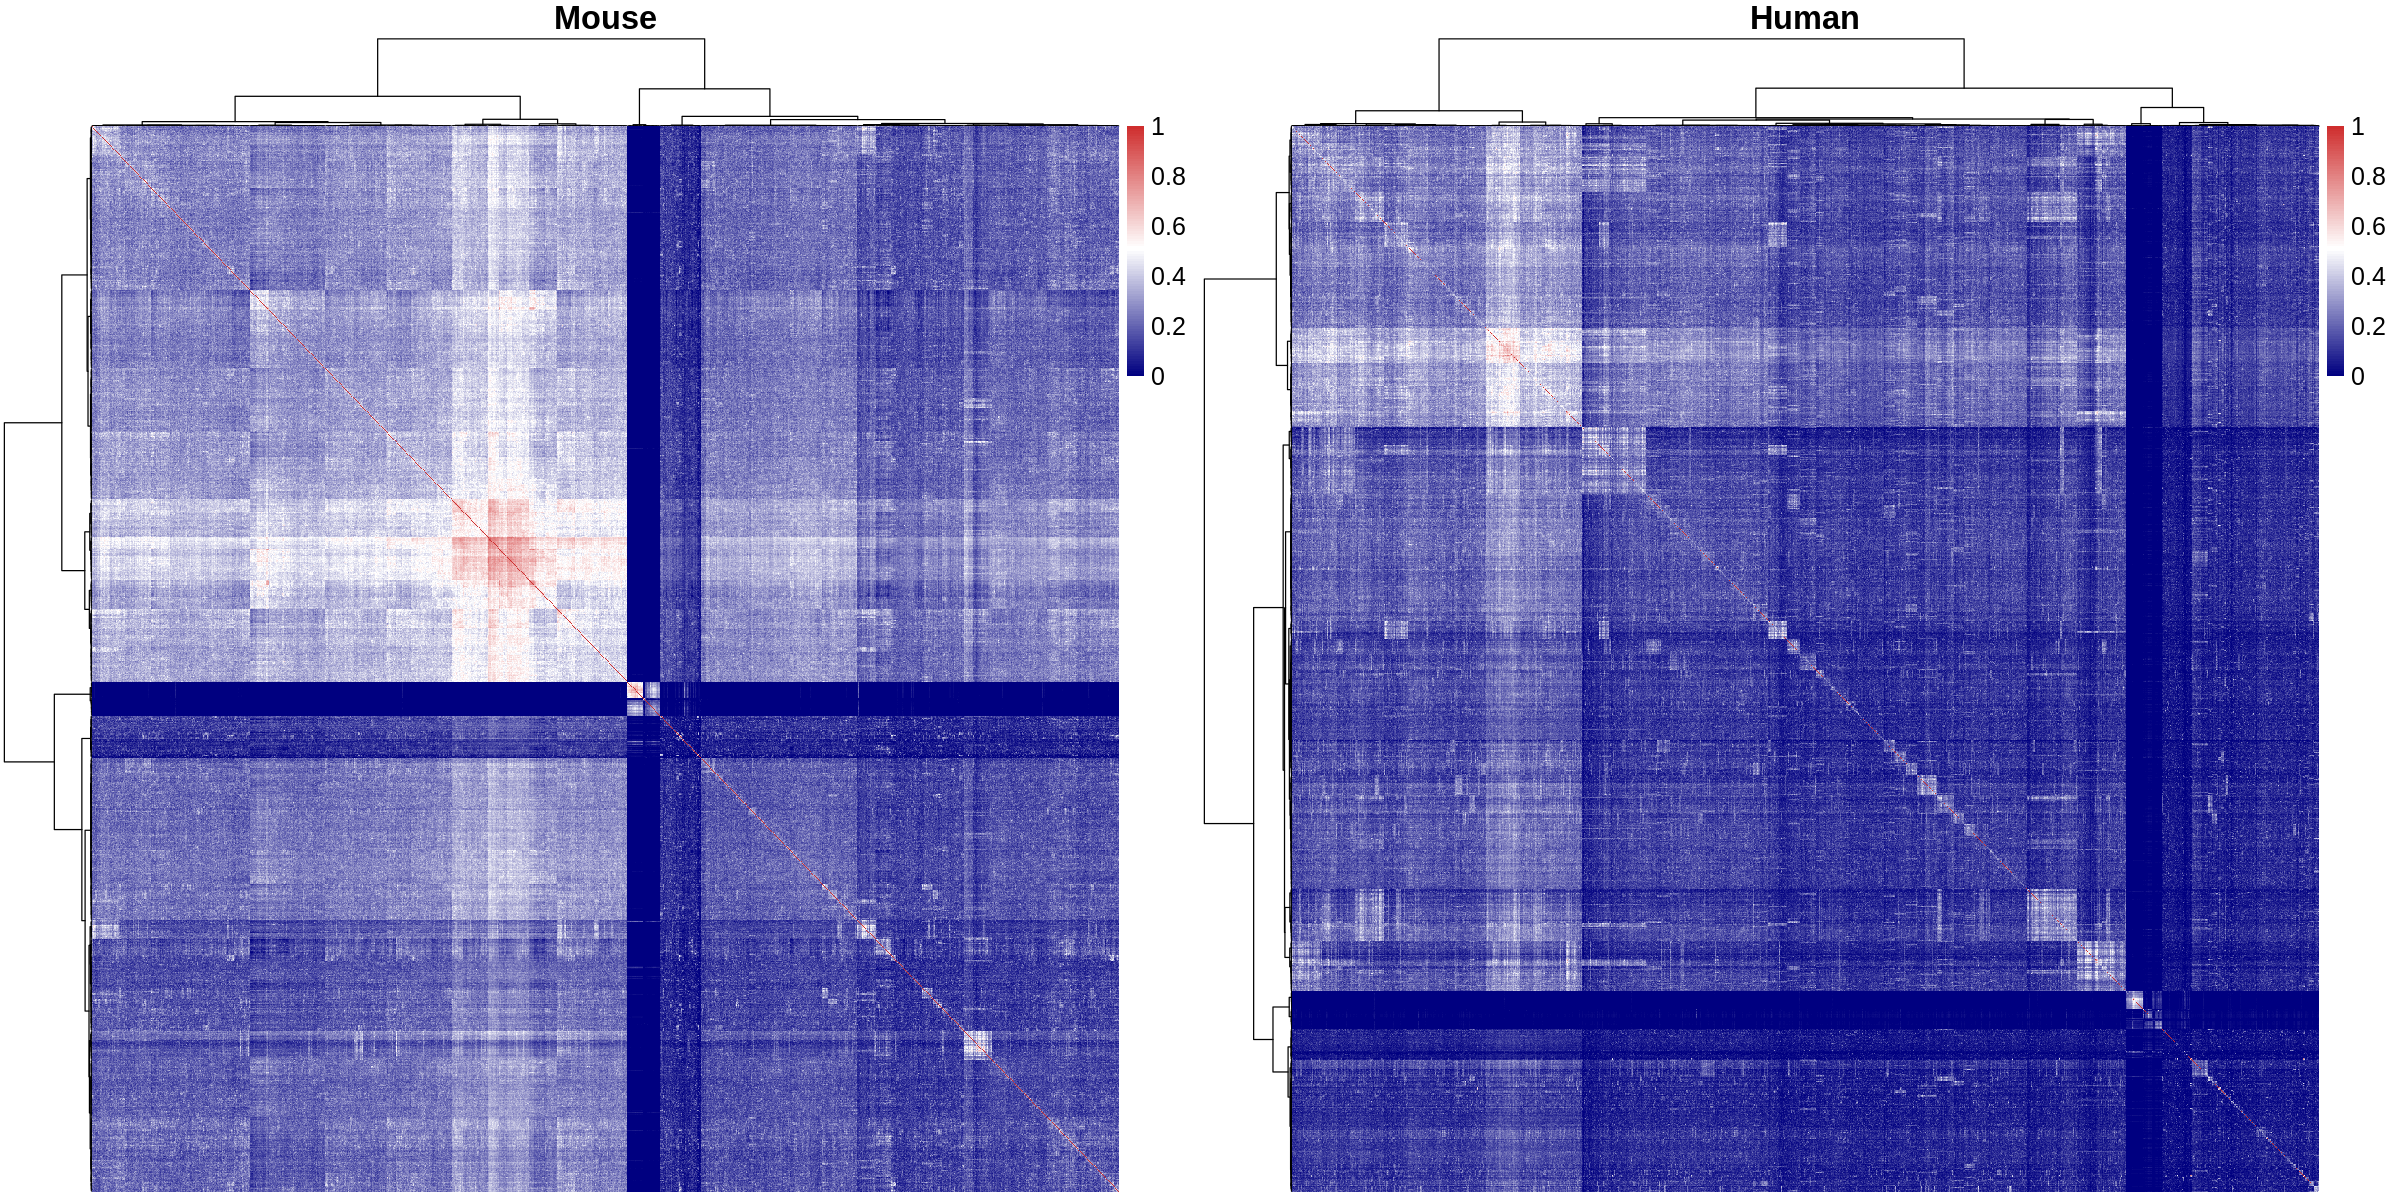

In [16]:
bk <- c(seq(0,1,by=0.01)) # seq(-1,0,by=0.01),
p1 <- pheatmap(mc, cluster_rows=TRUE, cluster_cols=TRUE, main="Mouse",     # color = rainbow(n, start=.7, end=.1), 
               color = c(colorRampPalette(colors = c("navy","white"))(length(bk)/2), colorRampPalette(colors = c("white","firebrick3"))(length(bk)/2)),
               breaks=bk, show_rownames=FALSE, show_colnames=FALSE, border_col=NA, fontsize=15, silent=TRUE, clustering_method='ward',
              )
p2 <- pheatmap(hc, cluster_rows=TRUE, cluster_cols=TRUE, main="Human", # color = colorRampPalette(c("navy", "white", "firebrick3"))(50),   # color = rainbow(n, start=.7, end=.1), 
               color = c(colorRampPalette(colors = c("navy","white"))(length(bk)/2), colorRampPalette(colors = c("white","firebrick3"))(length(bk)/2)),
               breaks=bk, show_rownames=FALSE, show_colnames=FALSE, border_col=NA, fontsize=15, silent=TRUE, clustering_method='ward',
              )

options(repr.plot.width = 20, repr.plot.height = 10)
cowplot::plot_grid(p1$gtable, p2$gtable, ncol=2) 
# colorbar 把低表达细胞去掉  
dev.off()